<a href="https://colab.research.google.com/github/Pavan6177/projects/blob/main/amazon_prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Load titles and credits datasets
titles_df = pd.read_csv('titles.csv')
credits_df = pd.read_csv('credits.csv')

# Display first few rows
titles_df.head(), credits_df.head()


(        id                        title   type  \
 0  ts20945            The Three Stooges   SHOW   
 1  tm19248                  The General  MOVIE   
 2  tm82253  The Best Years of Our Lives  MOVIE   
 3  tm83884              His Girl Friday  MOVIE   
 4  tm56584            In a Lonely Place  MOVIE   
 
                                          description  release_year  \
 0  The Three Stooges were an American vaudeville ...          1934   
 1  During America’s Civil War, Union spies steal ...          1926   
 2  It's the hope that sustains the spirit of ever...          1946   
 3  Hildy, the journalist former wife of newspaper...          1940   
 4  An aspiring actress begins to suspect that her...          1950   
 
   age_certification  runtime  \
 0             TV-PG       19   
 1               NaN       78   
 2               NaN      171   
 3               NaN       92   
 4               NaN       94   
 
                                               genres production

In [3]:
# Data info
titles_df.info()
credits_df.info()

# Check nulls
print(titles_df.isnull().sum())
print(credits_df.isnull().sum())

# Summarize datasets
titles_df.describe(include='all')
credits_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

,person_id,id,name,character,role
count,1.242350e+05,124235,124235,107948,124235
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115846
mean,4.064737e+05,NaN,NaN,NaN,NaN
std,5.616296e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.899200e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712560e+05,NaN,NaN,NaN,NaN


In [4]:
# Convert 'release_year' to numeric
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')
titles_df.dropna(subset=['release_year'], inplace=True)

# Parse 'genres' and 'production_countries' columns
def parse_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

titles_df['genres_list'] = titles_df['genres'].apply(parse_list)
titles_df['countries_list'] = titles_df['production_countries'].apply(parse_list)


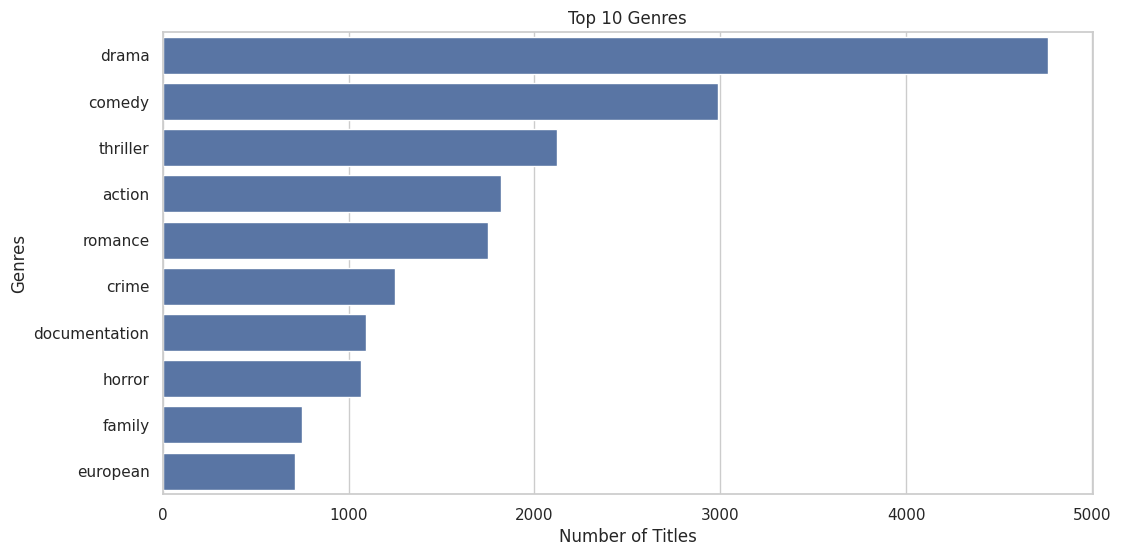

In [5]:
# Flatten genres list
all_genres = [genre for sublist in titles_df['genres_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

# Plot top genres
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()


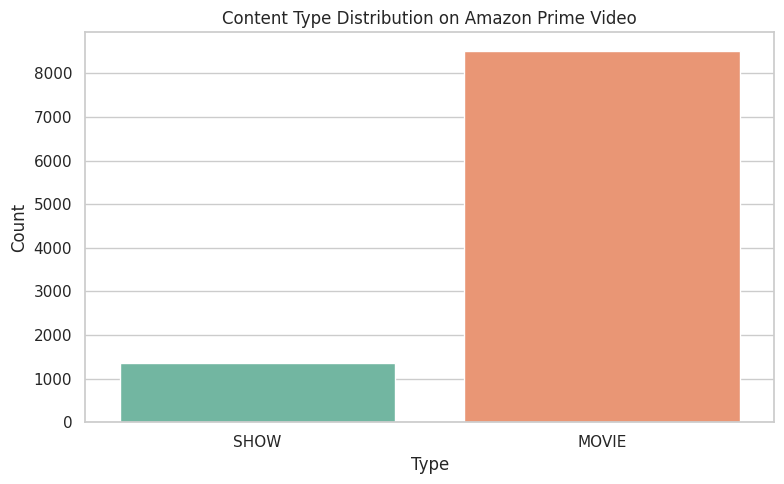

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titles_df, x='type', hue='type', palette="Set2", legend=False)
plt.title('Content Type Distribution on Amazon Prime Video')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


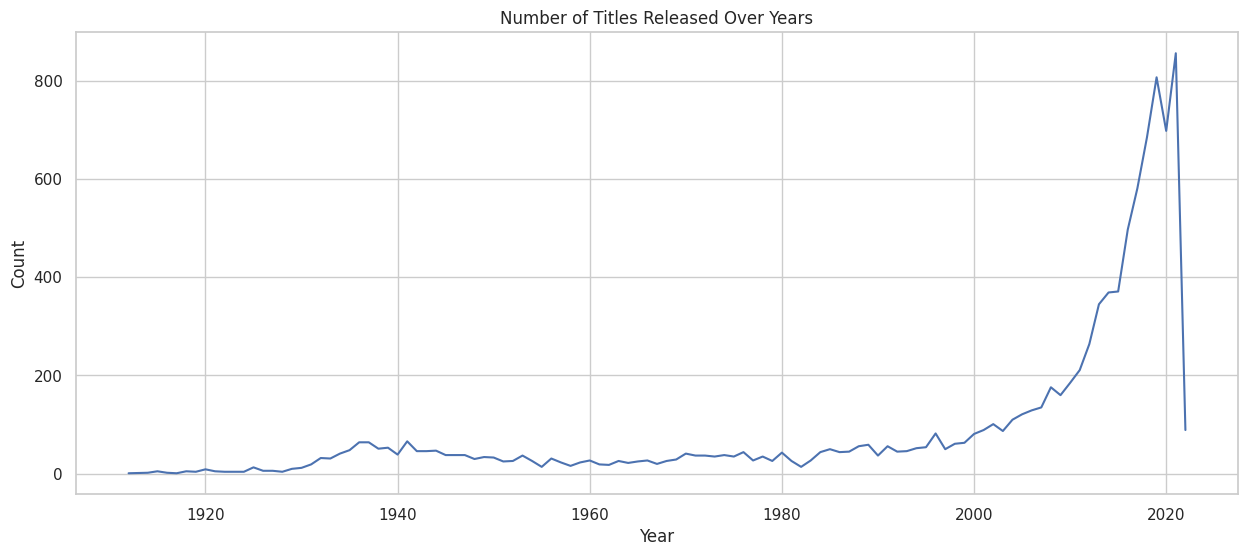

In [19]:
plt.figure(figsize=(15,6))
titles_per_year = titles_df['release_year'].value_counts().sort_index()
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title('Number of Titles Released Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


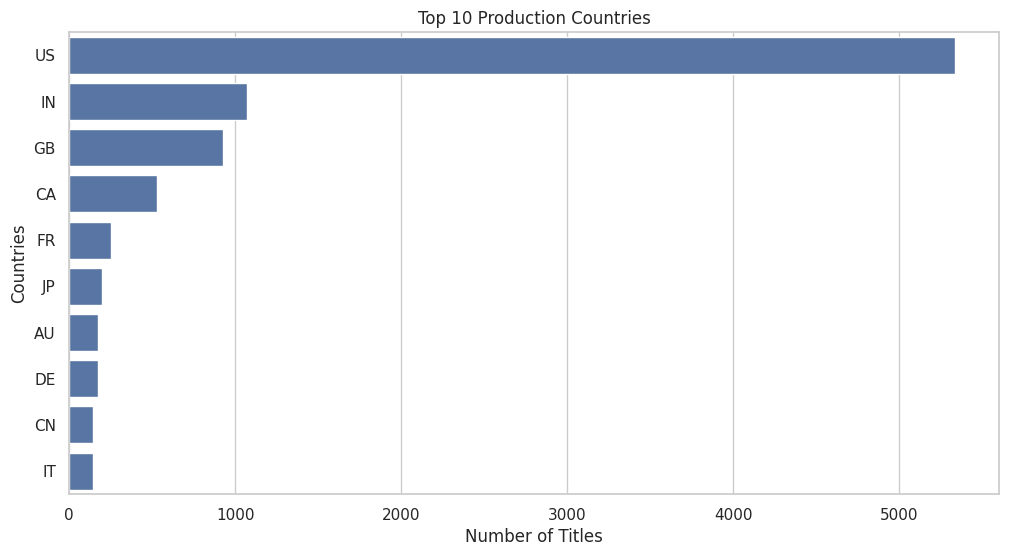

In [9]:
# Flatten countries list
all_countries = [country for sublist in titles_df['countries_list'] for country in sublist]
country_counts = pd.Series(all_countries).value_counts()

# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10])
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.show()


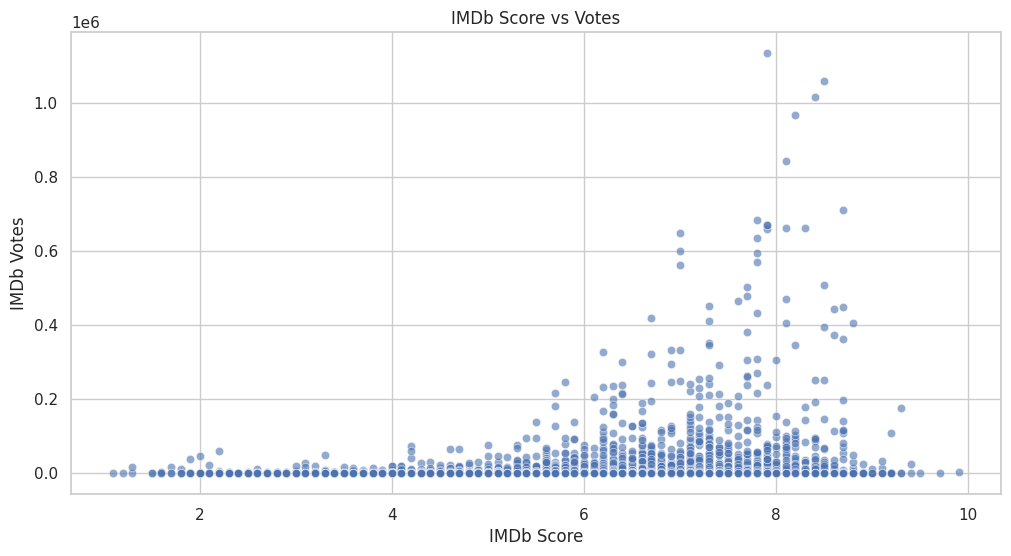

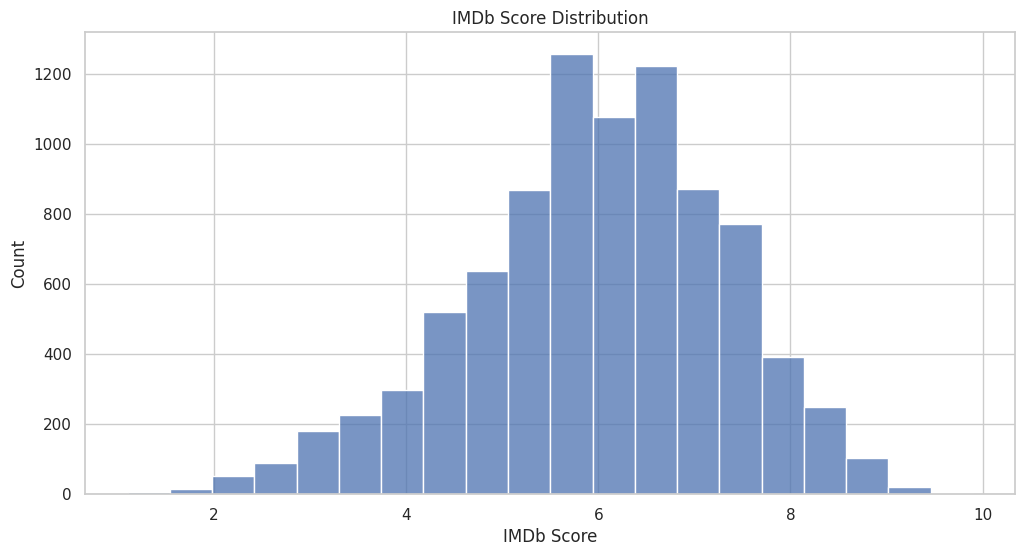

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=titles_df, x='imdb_score', y='imdb_votes', alpha=0.6)
plt.title('IMDb Score vs Votes')
plt.xlabel('IMDb Score')
plt.ylabel('IMDb Votes')
plt.show()

# Distribution of IMDb scores
plt.figure(figsize=(12,6))
sns.histplot(titles_df['imdb_score'], bins=20)
plt.title('IMDb Score Distribution')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()


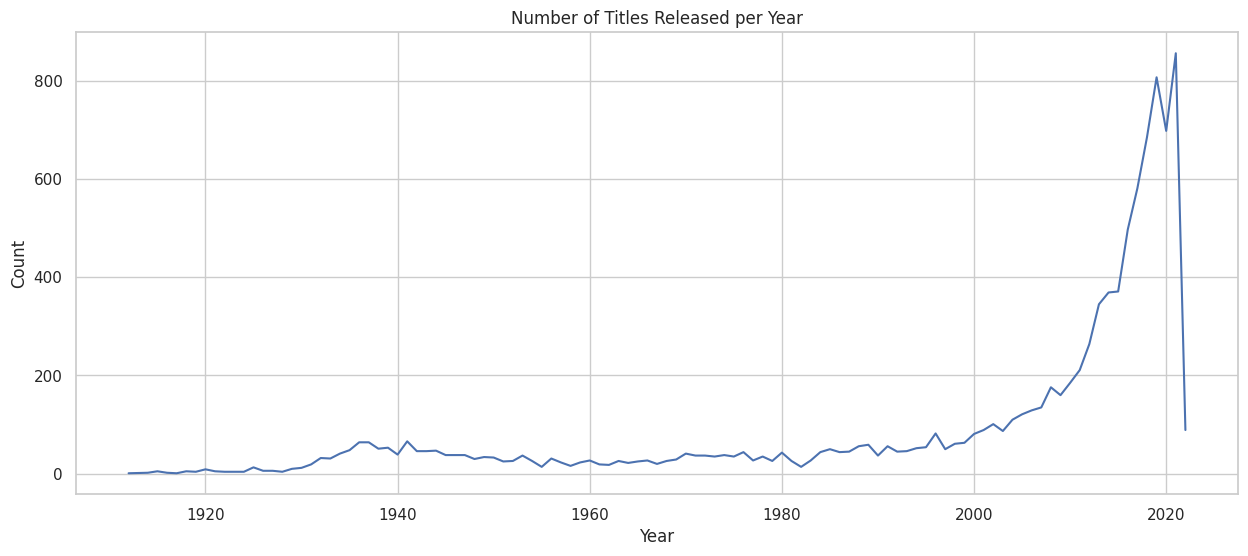

In [11]:
plt.figure(figsize=(15,6))
titles_per_year = titles_df['release_year'].value_counts().sort_index()
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


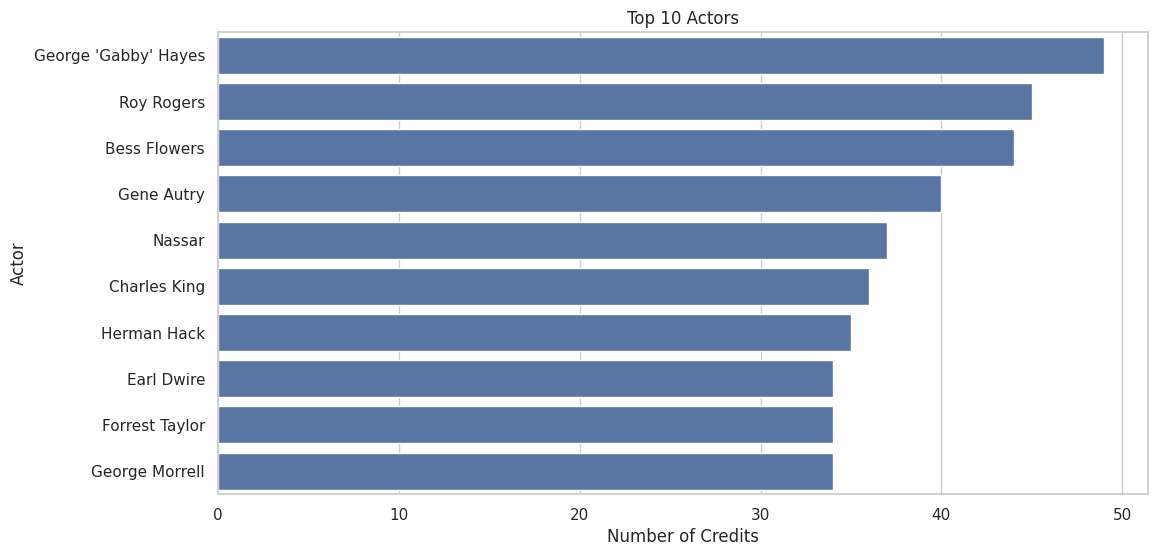

In [12]:
top_actors = credits_df[credits_df['role']=='ACTOR'].groupby('name').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors')
plt.xlabel('Number of Credits')
plt.ylabel('Actor')
plt.show()


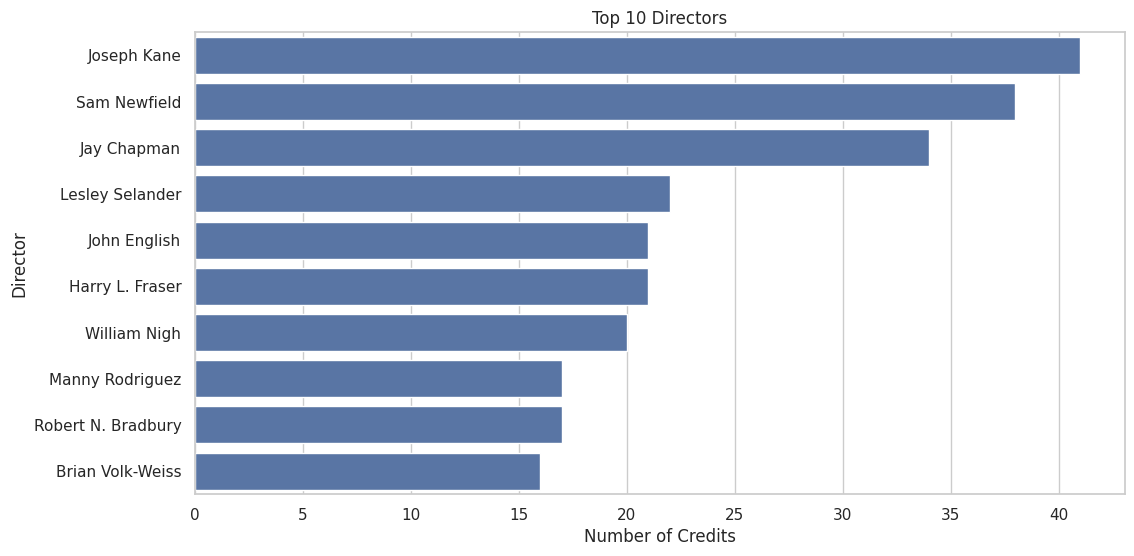

In [13]:
top_directors = credits_df[credits_df['role']=='DIRECTOR'].groupby('name').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')
plt.xlabel('Number of Credits')
plt.ylabel('Director')
plt.show()
